<a href="https://colab.research.google.com/github/RaphaelNetwork/notebooks/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install visualkeras

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

import cv2

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten,MaxPooling2D,Dropout,MaxPool2D
from keras.layers.normalization import BatchNormalization

import visualkeras
from keras.utils import plot_model

# **Loading Data**

In [3]:
#MNIST
train=pd.read_csv('/content/sample_data/mnist_train_small.csv',sep=',')
test=pd.read_csv('/content/sample_data/mnist_test.csv',sep=',')

In [4]:
col=['label']
for i in np.arange(784):
  col.append('pix'+str(i))

train.columns=col
test.columns=col

In [5]:
train.head()

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,pix11,pix12,pix13,pix14,pix15,pix16,pix17,pix18,pix19,pix20,pix21,pix22,pix23,pix24,pix25,pix26,pix27,pix28,pix29,pix30,pix31,pix32,pix33,pix34,pix35,pix36,pix37,pix38,...,pix744,pix745,pix746,pix747,pix748,pix749,pix750,pix751,pix752,pix753,pix754,pix755,pix756,pix757,pix758,pix759,pix760,pix761,pix762,pix763,pix764,pix765,pix766,pix767,pix768,pix769,pix770,pix771,pix772,pix773,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,pix11,pix12,pix13,pix14,pix15,pix16,pix17,pix18,pix19,pix20,pix21,pix22,pix23,pix24,pix25,pix26,pix27,pix28,pix29,pix30,pix31,pix32,pix33,pix34,pix35,pix36,pix37,pix38,...,pix744,pix745,pix746,pix747,pix748,pix749,pix750,pix751,pix752,pix753,pix754,pix755,pix756,pix757,pix758,pix759,pix760,pix761,pix762,pix763,pix764,pix765,pix766,pix767,pix768,pix769,pix770,pix771,pix772,pix773,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print('Train shape : ',train.shape)
print('Test shape : ',test.shape)

Train shape :  (19999, 785)
Test shape :  (9999, 785)


In [8]:
#Missing values in train set
train.isnull().any().sum()

0

In [9]:
#Missing values in test set
test.isnull().any().sum()

0

# **Data Visualization**

In [10]:
X_train=(train.iloc[:,1:].values).astype('float32')

label_train=train.iloc[:,0].values.astype('int32')

X_test=(test.iloc[:,1:].values).astype('float32')

label_test=test.iloc[:,0].values.astype('int32')

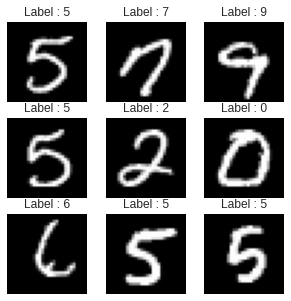

In [11]:
X_train=X_train.reshape(X_train.shape[0],28,28)

plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(330+(i+1))
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  plt.title('Label : {}'.format(label_train[i]))
  plt.grid(False)
  plt.axis('off')

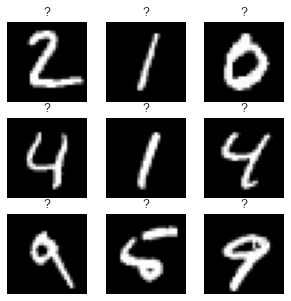

In [12]:
X_test=X_test.reshape(X_test.shape[0],28,28)

plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(330+(i+1))
  plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
  plt.title("?")
  plt.grid(False)
  plt.axis('off')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of image per digit in the train set')

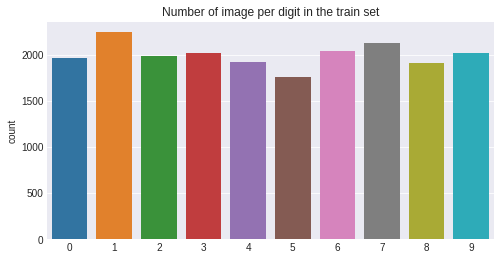

In [13]:
# Distribution of the labels in the train set

plt.figure(figsize=(8,4))
sns.countplot(label_train)
plt.title('Number of image per digit in the train set')

# **Data preprocessing**

In [14]:
X_train=X_train.reshape(train.shape[0],28,28,1)
X_test=X_test.reshape(test.shape[0],28,28,1)

In [15]:
# Standardization

X_train=X_train/255.0
X_test=X_test/255.0

In [16]:
# One hot encoding the label

Y_train=to_categorical(label_train,10)
Y_test=to_categorical(label_test,10)

print(label_train[0]," => ",Y_train[0])

5  =>  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
#Split the training set into a train and validation set

x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.3)

In [18]:
x_train[0].shape

(28, 28, 1)

# **Convolution Neural Network (CNN)**

## First version

In [19]:
#Simple CNN

model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


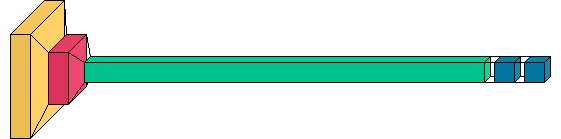

In [20]:
visualkeras.layered_view(model)

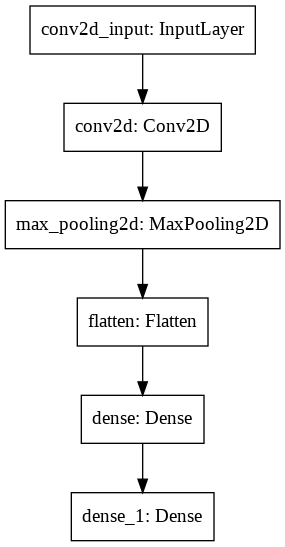

In [21]:
plot_model(model)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_history=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/20
219/219 [==============================] - 4s 7ms/step - loss: 0.6913 - accuracy: 0.7883 - val_loss: 0.1632 - val_accuracy: 0.9512
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1391 - accuracy: 0.9606 - val_loss: 0.1037 - val_accuracy: 0.9688
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0747 - accuracy: 0.9792 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0438 - accuracy: 0.9885 - val_loss: 0.0934 - val_accuracy: 0.9708
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0732 - val_accuracy: 0.9767
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0175 - accuracy: 0.9962 - val_loss: 0.0704 - val_accuracy: 0.9798
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.0784 - val_accuracy: 0.9770
Epoch 

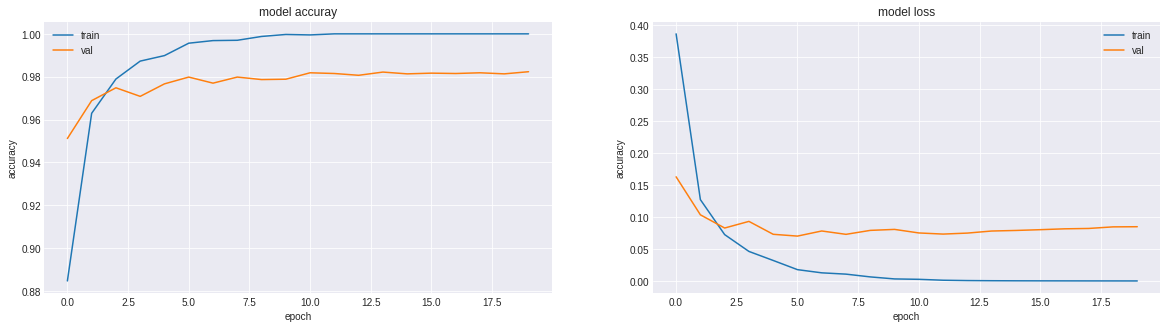

In [24]:
fig,ax=plt.subplots(figsize=(20,5),nrows=1,ncols=2)

ax[0].plot(model_history.history['accuracy'])
ax[0].plot(model_history.history['val_accuracy'])
ax[0].set_title('model accuray')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train','val'],loc='best')

ax[1].plot(model_history.history['loss'])
ax[1].plot(model_history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend(['train','val'],loc='best')




In [25]:
#Prediction
prediction1=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


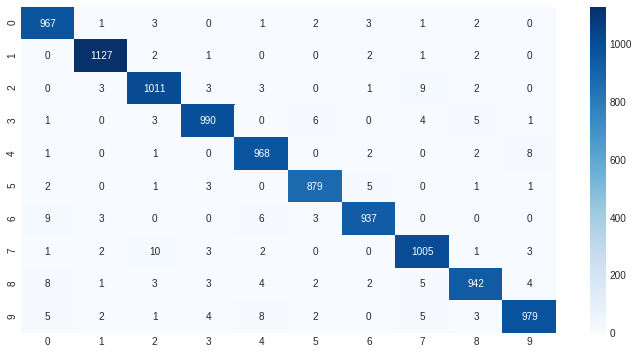

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(label_test,prediction1), annot=True, 
            fmt='1',
            cmap='Blues')

In [27]:
print("Accuracy : ",round(accuracy_score(label_test,prediction1),ndigits=2)*100,"%")

Accuracy :  98.0 %


## Second version 

In [29]:
modelB=Sequential()

modelB.add(Conv2D(filters=32,padding='same',kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
modelB.add(MaxPooling2D())
modelB.add(BatchNormalization())

modelB.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
modelB.add(MaxPooling2D())
modelB.add(BatchNormalization())

modelB.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
modelB.add(MaxPooling2D())

modelB.add(Flatten())
modelB.add(BatchNormalization())

modelB.add(Dense(256,activation="relu"))
modelB.add(Dense(10,activation="softmax"))

modelB.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
modelB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

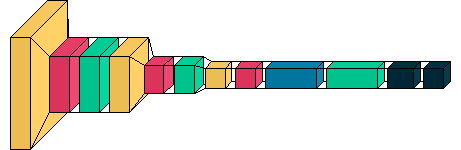

In [31]:
visualkeras.layered_view(modelB)

In [32]:

history_modelB=modelB.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
438/438 [==============================] - 3s 6ms/step - loss: 0.3448 - accuracy: 0.8911 - val_loss: 1.1069 - val_accuracy: 0.6228
Epoch 2/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 3/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9863 - val_loss: 0.0697 - val_accuracy: 0.9810
Epoch 4/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0637 - val_accuracy: 0.9832
Epoch 5/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0639 - val_accuracy: 0.9853
Epoch 6/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0793 - val_accuracy: 0.9823
Epoch 7/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0737 - val_accuracy: 0.9845
Epoch 

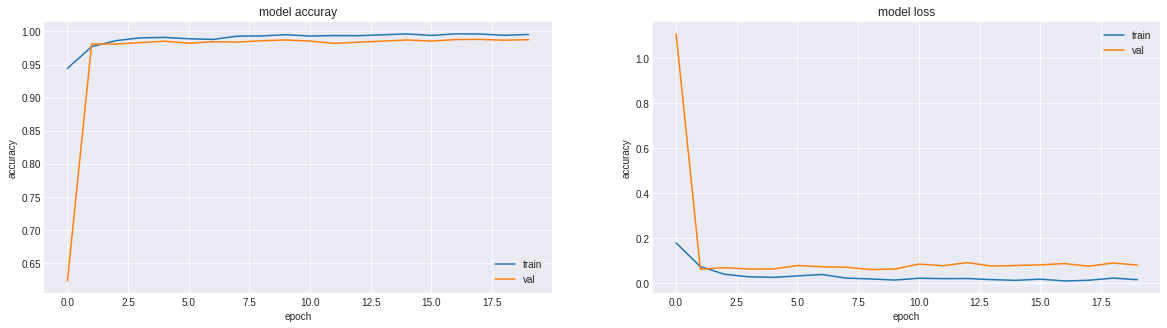

In [33]:
fig,ax=plt.subplots(figsize=(20,5),nrows=1,ncols=2)

ax[0].plot(history_modelB.history['accuracy'])
ax[0].plot(history_modelB.history['val_accuracy'])
ax[0].set_title('model accuray')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train','val'],loc='best')

ax[1].plot(history_modelB.history['loss'])
ax[1].plot(history_modelB.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend(['train','val'],loc='best')

In [34]:
predictionB=modelB.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


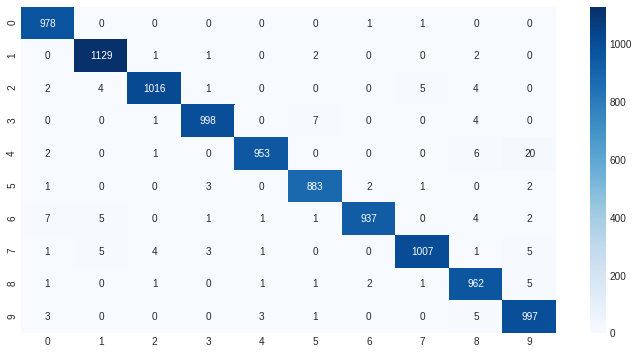

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(label_test,predictionB), annot=True, 
            fmt='1',
            cmap='Blues')

In [36]:
print("Accuracy : ",round(accuracy_score(label_test,predictionB),ndigits=2)*100,"%")

Accuracy :  99.0 %
